In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from PIL import Image
from highlight_text import htext
from matplotlib import cm
import matplotlib.patheffects as path_effects
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)

________________________________________________

In [3]:
# with open('./JSON/RBL_Lyon.json') as json_file:
#     data = json.load(json_file)

# event = []
# minute = []
# second = []
# player = []
# team = []
# outcome = []
# x = []
# y = []
# endX = []
# endY = []
# goal = []
# passtype = []


# for each in data['events']:
#     event.append(each['type']['displayName'])
#     try:
#         minute.append(each['minute'])
#     except:
#         minute.append('')
#     try:
#         second.append(each['second'])
#     except:
#         second.append('')
#     try:
#         player.append(each['playerId'])
#     except:
#         player.append('')
#     try:
#         team.append(each['teamId'])
#     except:
#         team.append('')
#     try:
#         endX.append(each['endX'])
#         endY.append(each['endY'])
#     except:
#         endX.append('')
#         endY.append('')
#     outcome.append(each['outcomeType']['displayName'])
#     x.append(each['x'])
#     y.append(each['y'])

#     for key, value in each.items():
#         passType = 'OpenPlay'
#         if key == 'qualifiers':
#             for item in value:
#                 if item['type']['displayName'] == 'IntentionalGoalAssist':
#                     passType = item['type']['displayName']
#                 elif item['type']['displayName'] == 'BigChanceCreated':
#                     passType = item['type']['displayName']
#                 elif item['type']['displayName'] == 'Assisted':
#                     passType = item['type']['displayName']
#             passtype.append(passType)
                
# events = pd.DataFrame({'Event':event, 'Minute':minute, 'Second':second, 'Player':player, 'Team':team, 'Outcome':outcome, 'x':x, 'y':y,
#                       'endX':endX, 'endY':endY, 'passtype':passtype})

In [4]:
# events.Event.value_counts()

In [5]:
# events.to_csv('Man City_Lyon.csv', index=False)

In [6]:
combined = pd.read_csv('./csv/partey_all.csv')

In [7]:
mask = combined['Player'] == 238940
partey = combined.loc[mask]
partey.Event.value_counts()

Pass               1850
BallRecovery        251
Aerial               95
BallTouch            89
Tackle               82
Foul                 81
TakeOn               73
Interception         47
Clearance            40
Challenge            36
BlockedPass          21
CornerAwarded        21
MissedShots          20
Dispossessed         18
SavedShot            16
OffsidePass          13
Card                 12
Save                 10
SubstitutionOff       8
Error                 7
SubstitutionOn        6
Goal                  4
ShieldBallOpp         2
Name: Event, dtype: int64

In [33]:
partey2 = pd.read_csv('./Leverkusen_Atletico.csv')

In [28]:
mask = combined2['Player'] == 238940
partey1 = combined2.loc[mask]
partey1.Event.value_counts()

Pass             53
BallRecovery      9
BallTouch         5
Tackle            4
Aerial            3
BlockedPass       3
Goal              1
Dispossessed      1
Foul              1
CornerAwarded     1
TakeOn            1
Interception      1
Challenge         1
Clearance         1
OffsidePass       1
Name: Event, dtype: int64

In [29]:
combined2

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype
0,Start,0,0.0,NaN,63,Successful,0.0,0.0,NaN,NaN,OpenPlay
1,Start,0,0.0,NaN,36,Successful,0.0,0.0,NaN,NaN,OpenPlay
2,Pass,0,1.0,92812.0,36,Successful,50.0,50.0,47.8,45.5,OpenPlay
3,Pass,0,2.0,326413.0,36,Successful,46.6,45.4,36.1,62.0,OpenPlay
4,Pass,0,4.0,115166.0,36,Successful,36.0,65.7,40.0,91.5,OpenPlay
...,...,...,...,...,...,...,...,...,...,...,...
1728,End,94,58.0,NaN,36,Successful,0.0,0.0,NaN,NaN,OpenPlay
1729,End,0,0.0,NaN,63,Successful,0.0,0.0,NaN,NaN,OpenPlay
1730,End,0,0.0,NaN,36,Successful,0.0,0.0,NaN,NaN,OpenPlay
1731,FormationSet,0,0.0,NaN,63,Successful,0.0,0.0,NaN,NaN,OpenPlay


In [16]:
mask = ((partey['Event'] == 'Goal'))
goals = partey.loc[mask]
goals

,Event,Minute,Second,Player,Team,Outcome,X,Y,endX,endY,passtype,Unnamed: 0,Rk,Nation,Pos,Squad,Comp,Age,Born,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Succ,Att,Succ%,#Pl,Megs,Carries,TotDist,PrgDist,Targ,Rec,Rec%,Miscon,Dispos,Matches,eventId,expandedMinute,id,isTouch,minute,qualifiers,satisfiedEventsTypes,second,teamId,x,y,outcomeType_displayName,outcomeType_value,period_displayName,period_value,type_displayName,type_value,playerId,goalMouthY,goalMouthZ,isShot,relatedEventId,relatedPlayerId,blockedX,blockedY,isGoal,isOwnGoal,cardType_displayName,cardType_value,$idx,$len,field,satisfiers,text,cardType_$idx,cardType_$len,minuteInfo_expandedMinute,minuteInfo_extraTime,minuteInfo_isEndOfPeriod,minuteInfo_minute,minuteInfo_minuteString,minuteInfo_period,type_$idx,type_$len,Assist
55129,Goal,42.0,16.0,238940,63.0,Successful,81.1,53.6,NaN,NaN,OpenPlay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60110,Goal,57.0,15.0,238940,63.0,Successful,95.7,50.9,NaN,NaN,OpenPlay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65335,Goal,79.0,30.0,238940,63.0,Successful,92.5,50.1,NaN,NaN,OpenPlay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68470,Goal,89.0,58.0,238940,63.0,Successful,90.5,50.9,NaN,NaN,OpenPlay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
mask3 = (partey['Event'] == 'MissedShots') | (partey['Event'] == 'SavedShot')
shot = partey.loc[mask3]
len(shot)

36

In [14]:
mask5 = (partey['passtype'] != 'IntentionalGoalAssist') & (partey['passtype'] != 'BigChanceCreated') & (partey['X'] < 99) & (partey['Y'] < 99) & ((partey['X'] > 1) & (partey['Y'] > 1)) & ((partey['Y'] != 50.3) & (partey['X'] != 50.7)) & (partey['X'] != 50.9) & (partey['Y'] != 50.1) & (partey['Y'] != 50.0)
touch = partey.loc[mask5]
len(touch)

2730

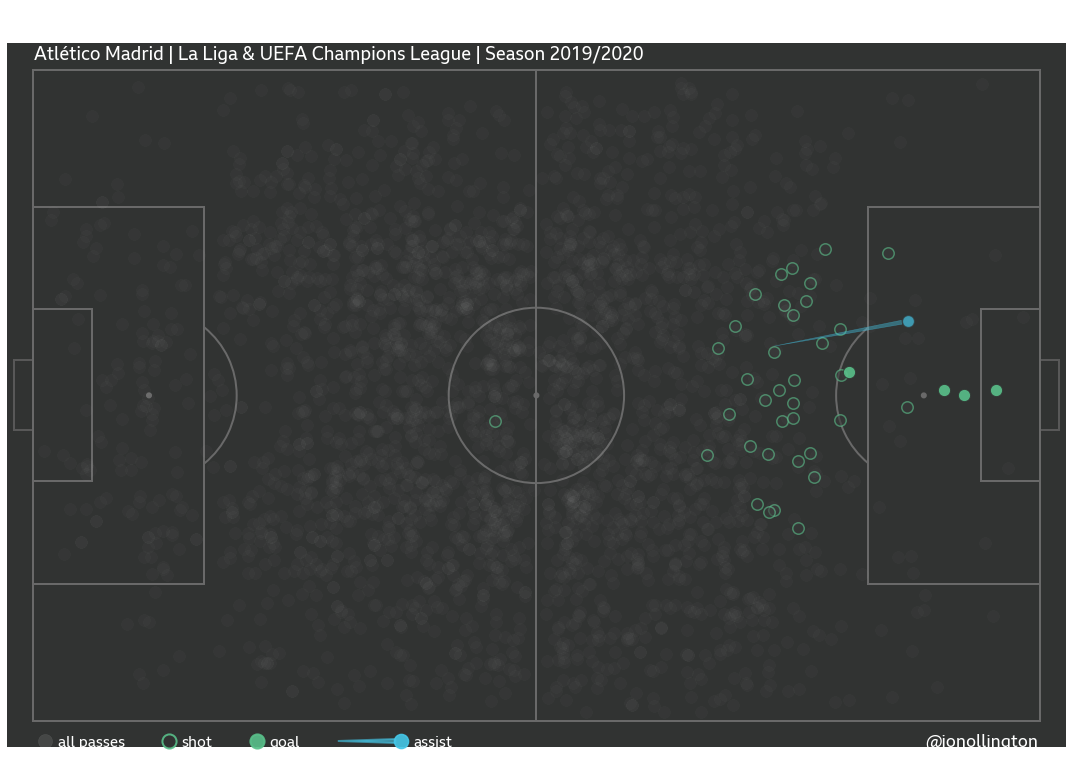

In [34]:
background = "#313332"
line = '#696969'
text_color ='white'
touches = '#f62681'
assisted = "#45c7e8"
assisted1= '#308BA2'
goal = '#59c08a'
title_font = "BBC Reith Sans"
body_font = "BBC Reith Sans"

pitch = Pitch(figsize=(15,15),orientation='horizontal',view='full',goal_type='box',pitch_type='opta',
              pitch_color=background, line_color=line,constrained_layout=False)

fig, ax = pitch.draw()

#touches
x = touch.X.values
y = touch.Y.values
ax.scatter(x,y,color='white', s=150, zorder=12, alpha=0.02)

#assists
style="wedge,tail_width=0.4"
xA = partey2.x.values
yA = partey2.y.values
xEA = partey2.endX.values
yEA = partey2.endY.values

plt.scatter(xEA,yEA,color=assisted, s=150, ec=background, lw=1.5,zorder=14, alpha=0.7)

for i in range(len(partey2)):
    plt.annotate('', xy=(xA[i],yA[i]), xytext=(xEA[i],yEA[i]), zorder=11, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='#45c7e8', shrinkA=6, alpha=0.4))

    
#shots
xS = shot.X.values
yS = shot.Y.values

plt.scatter(xS,yS,color=background, ec=goal, lw=1.5, s=130, zorder=10, alpha=0.6)

#goals
xG = goals.X.values
yG = goals.Y.values
plt.scatter(xG,yG,color=goal, ec=background, lw=1, s=150, zorder=13, alpha=0.9)

# #shots
# xS1 = shot1.X.values
# yS1 = shot1.Y.values

# plt.scatter(xS1,yS1,color=background, ec=goal, lw=1.5, s=130, zorder=10, alpha=0.6)

# #goals
# xG1 = goals1.X.values
# yG1 = goals1.Y.values
# plt.scatter(xG1,yG1,color=goal, ec=background, lw=1, s=150, zorder=13, alpha=0.9)

fig.text(0.035, 0.835, "Thomas Partey",fontsize=35, fontfamily=body_font, color=text_color, weight='bold',zorder=2)
fig.text(0.035, 0.811, "Atlético Madrid | La Liga & UEFA Champions League | Season 2019/2020",fontsize=18, fontfamily=body_font, color=text_color,zorder=2)


ax3 = fig.add_axes([0.02,0.17,0.05,0.02])
ax3.axis("off")
ax3.scatter([0.02],[0.05],c='white', s=200, zorder=12, alpha=0.1)
fig.text(0.057, 0.175, "all passes",fontsize=15, fontfamily=body_font, color=text_color)

ax4 = fig.add_axes([0.135,0.17,0.05,0.02])
ax4.axis("off")
ax4.scatter([0.135],[0.05],ec=goal, c=background, s=200, linewidth=2, zorder=12, alpha=0.9)
fig.text(0.171, 0.175, "shot",fontsize=15, fontfamily=body_font, color=text_color)

ax5 = fig.add_axes([0.216,0.17,0.05,0.02])
ax5.axis("off")
ax5.scatter([0.216],[0.05],c=goal, s=200, linewidth=2, zorder=12, alpha=0.9)
fig.text(0.253, 0.175, "goal",fontsize=15, fontfamily=body_font, color=text_color)

ax6 = fig.add_axes([0.3,0.17,0.05,0.02])
ax6.axis("off")
ax6.annotate('', [0.3,0.5],[1.5,0.5], zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=2,  color=assisted, shrinkA=6, alpha=0.6))

ax7 = fig.add_axes([0.35,0.17,0.05,0.02])
ax7.axis("off")
ax7.scatter([0.35],[0.05],ec=assisted, c=assisted, s=200, linewidth=1.5, zorder=12, alpha=0.9)
fig.text(0.386, 0.175, "assist",fontsize=15, fontfamily=body_font, color=text_color)

# ax8 = fig.add_axes([0.52,0.17,0.05,0.02])
# ax8.axis("off")
# ax8.annotate('', [0.52,0.5],[1.5,0.5], zorder=7, arrowprops=dict(arrowstyle=style,
#             linewidth=2,  color=assisted, shrinkA=6, alpha=0.6))

# ax9 = fig.add_axes([0.573,0.17,0.05,0.02])
# ax9.axis("off")
# ax9.scatter([0.573],[0.05], c=assisted, s=200, linewidth=1.5, zorder=12, alpha=0.9)
# fig.text(0.609, 0.175, "assist",fontsize=15, fontfamily=body_font, color=text_color)

fig.text(0.86, 0.175, "@jonollington",fontsize=17, fontfamily=body_font, color=text_color)

plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("partey",bbox_inches="tight",dpi=500);

In [35]:
# import os
# import glob
# import pandas as pd
# import seaborn as sns

In [43]:
# extension = 'csv'
# all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

# #combine all files in the list
# combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
# #export to csv
# combined_csv.to_csv( "aouar_all.csv", index=False, encoding='utf-8-sig')

In [44]:
partey = pd.read_csv('./csv/partey_all_laliga.csv')

In [ ]:
cont = pd.read_html('https://fbref.com/en/comps/Big5/2015-2016/stats/players/2015-2016-Big-5-European-Leagues-Stats')[0]

In [ ]:
def drop_header(df):
    my_df = df.copy()
    my_df = my_df.droplevel(0, axis=1)
    return(my_df)

In [ ]:
cont = drop_header(cont)

In [ ]:
def cleaner(df):
    all_columns = list(df.columns)
    unwanted_columns = {'Player','Comp'}
    index_columns = [ele for ele in all_columns if ele not in unwanted_columns]
    num_df = df.loc[:,index_columns].apply(pd.to_numeric, errors='coerce')
    num_df.fillna(0, inplace=True)
    master_df = pd.concat([df[['Player', 'Comp']], num_df], axis = 1)
    return master_df   

In [ ]:
# mask = (cont['Comp'] == 'eng Premier League') & (cont['G+A'] > '0')
# cont = cont.loc[mask]

In [ ]:
# mask2=(cont['Player']=='Mesut Özil')
# ozil=cont[mask2]
# ozil

_________________________________________________

In [45]:
#calculate pass distance
partey['dist'] = np.sqrt( (partey.endX-partey.X)**2 + (partey.endY-partey.Y)**2)

In [46]:
partey['end_dist_from_goal'] = np.sqrt( (partey.endX-100)**2 + (partey.endY-50)**2)

In [47]:
partey['start_dist_from_goal'] = np.sqrt( (partey.X-100)**2 + (partey.Y-50)**2)

In [48]:
partey['prog_pass'] = partey['start_dist_from_goal'] - partey['end_dist_from_goal']

In [49]:
pp =  (partey['prog_pass'] > 9.144) & (partey['endX'] > partey['X']) & ((partey['Event'] == 'Pass') & (partey['Outcome'] == 'Successful'))
prog=partey.loc[pp]
len(prog)

5092

In [ ]:
pp =  (partey['prog_pass'] > 9.144) & (partey['endX'] > partey['X']) & ((partey['Event'] == 'Pass') & (partey['Outcome'] == 'Successful'))
prog=partey.loc[pp]
prog

In [ ]:
pp =  (partey['prog_pass'] > 10.3) & (partey['endX'] > partey['X']) & ((partey['Event'] == 'Pass') & (partey['Outcome'] == 'Successful'))
prog=partey.loc[pp]
len(prog)

In [ ]:
pp =  (partey['prog_pass'] > 9.144) & (partey['endX'] > partey['X']) & ((partey['Event'] == 'Pass') & (partey['Outcome'] == 'Unsuccessful'))
unprog=partey.loc[pp]
len(unprog)

In [ ]:
background = "#313332"
line = '#696969'
text_color ='white'
touches = '#f62681'
assisted = "#45c7e8"
assisted1= '#308BA2'
goal = '#59c08a'
title_font = "BBC Reith Sans"
body_font = "BBC Reith Sans"

pitch = Pitch(figsize=(15,15),orientation='horizontal',view='full',goal_type='box',pitch_type='opta',
              pitch_color=background, line_color=line,constrained_layout=False)

fig, ax = pitch.draw()

#progressive passes
style="wedge,tail_width=0.4"
xA = prog.X.values
yA = prog.Y.values
xEA = prog.endX.values
yEA = prog.endY.values

plt.scatter(xEA,yEA,color=background, s=150, ec=assisted, lw=1.5,zorder=15, alpha=0.6)

for i in range(len(prog)):
    plt.annotate('', xy=(xA[i],yA[i]), xytext=(xEA[i],yEA[i]), zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color=assisted, shrinkA=6, alpha=0.4))

#area pass
xAP = area_pass.X.values
yAP = area_pass.Y.values
xEAP = area_pass.endX.values
yEAP = area_pass.endY.values

plt.scatter(xEAP,yEAP,color=background, s=150, ec=assisted, lw=1.5,zorder=14, alpha=0.5)

for i in range(len(area_pass)):
    plt.annotate('', xy=(xAP[i],yAP[i]), xytext=(xEAP[i],yEAP[i]), zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color=assisted, shrinkA=6, alpha=0.4))
    
    
#not successful progressive passes
xU = unprog.X.values
yU = unprog.Y.values
xEU = unprog.endX.values
yEU = unprog.endY.values

plt.scatter(xEU,yEU,color=background, s=150, ec='lightgrey', lw=1.5,zorder=6, alpha=0.09)

for i in range(len(unprog)):
    plt.annotate('', xy=(xU[i],yU[i]), xytext=(xEU[i],yEU[i]), zorder=6, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='lightgrey', shrinkA=6, alpha=0.09))

#not successful area pass
xUP = area_unpass.X.values
yUP = area_unpass.Y.values
xEUP = area_unpass.endX.values
yEUP = area_unpass.endY.values

plt.scatter(xEUP,yEUP,color=background, s=150, ec='lightgrey', lw=1.5,zorder=6, alpha=0.09)

for i in range(len(area_unpass)):
    plt.annotate('', xy=(xUP[i],yUP[i]), xytext=(xEUP[i],yEUP[i]), zorder=6, arrowprops=dict(arrowstyle=style,
            linewidth=0.5,  color='lightgrey', shrinkA=6, alpha=0.09))

    

fig.text(0.035, 0.935, "Thomas Partey",fontsize=35, fontfamily=body_font, color=text_color, weight='bold',zorder=2)
fig.text(0.035, 0.915, "Atlético Madrid | La Liga | Season 2019/2020",fontsize=20, fontfamily=body_font, color=text_color,zorder=2)
fig.text(0.65, 0.868, "Progressive Passes",fontsize=20, fontfamily=body_font, color=text_color,zorder=2, weight='bold')
# fig.text(0.035, 0.96, "n",fontsize=20,color=background,zorder=1)
n = fig.text(0.6, 0.848, "Thomas Partey",fontsize=16, fontfamily=body_font, color=background,zorder=2, ha='center')
fig.text(0.735, 0.83, "                               completed 186 (6.57 p/90) progressive\npasses (89th percentile) during 2019/20",fontsize=16, fontfamily=body_font, color=text_color,zorder=2, ha='center')

n.set_path_effects([path_effects.withStroke(linewidth=4,foreground=assisted)])

ax2 = fig.add_axes([0.02,0.804,0.5,0.11]) # beeswarm

ax2.patch.set_facecolor(background)
plt.sca(ax2)
sns.swarmplot(x=master_df["prog_p90"],color='silver',zorder=1,alpha=1, size=7)
sns.swarmplot(x=partey_bee["prog_p90"],color=background,ec=assisted,linewidth=4,zorder=1, size=15)
plt.axis('off')

# ax2 = fig.add_axes([0.9,0.90,0.075,0.075]) # badge
# ax2.axis("off")
# img = Image.open('./Arsenal.png')
# ax2.imshow(img)

ax6 = fig.add_axes([0.08,0.17,0.05,0.02])
ax6.axis("off")
ax6.annotate('', [0.08,0.5],[1.5,0.5], zorder=7, arrowprops=dict(arrowstyle=style,
            linewidth=2,  color=assisted, shrinkA=6, alpha=0.6))

ax7 = fig.add_axes([0.12,0.17,0.05,0.02])
ax7.axis("off")
ax7.scatter([0.12],[0.05],ec=assisted, c=background, s=200, linewidth=1.5, zorder=12, alpha=0.9)
fig.text(0.05, 0.175, "start",fontsize=15, fontfamily=body_font, color=text_color)
fig.text(0.1565, 0.175, "end location",fontsize=15, fontfamily=body_font, color=text_color)

fig.text(0.86, 0.935, "@jonollington",fontsize=17, fontfamily=body_font, color=text_color)
fig.text(0.35, 0.175, "Completed passes that move the ball towards the opponent's goal at least 10 yards, or completed passes into the penalty area",fontsize=12, fontfamily=body_font, color=text_color,fontstyle="italic")

plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("partey_prog",bbox_inches="tight",dpi=300);

In [ ]:
area = ((partey['X'] < 99) & (partey['endY'] > 22)) & ((partey['X'] < 99) & (partey['Y'] < 22)) & (partey['endY'] < 78) & ((partey['endX'] > 84)) & (partey['Outcome'] == 'Successful')
area_pass = partey.loc[area]
len(area_pass)

In [ ]:
mask = (partey['Event']=='Pass') & (partey['Outcome']=='Successful')
partey_pass=partey.loc[mask]

In [ ]:
area = (partey_pass['X']<99.5) & (partey_pass['endX']>82) & ((partey_pass['Y']>79) & (partey_pass['endY']<79) | (partey_pass['Y']<21) & (partey_pass['endY']>21))
area_pass = partey_pass.loc[area]
len(area_pass)

In [ ]:
mask = (partey['Event']=='Pass') & (partey['Outcome']=='Unsuccessful')
partey_unpass=partey.loc[mask]

In [ ]:
area = (partey_unpass['X']<99.5) & (partey_unpass['endX']>82) & ((partey_unpass['Y']>79) & (partey_unpass['endY']<79) | (partey_unpass['Y']<21) & (partey_unpass['endY']>21))
area_unpass = partey_unpass.loc[area]
len(area_unpass)

In [ ]:
fbprog = pd.read_html('https://fbref.com/en/comps/Big5/2019-2020/passing/players/2019-2020-Big-5-European-Leagues-Stats')[0]

In [ ]:
def drop_header(df):
    my_df = df.copy()
    my_df = my_df.droplevel(0, axis=1)
    return(my_df)

In [ ]:
cont = drop_header(fbprog)

In [ ]:
def cleaner(df):
    all_columns = list(df.columns)
    unwanted_columns = {'Player','Comp'}
    index_columns = [ele for ele in all_columns if ele not in unwanted_columns]
    num_df = df.loc[:,index_columns].apply(pd.to_numeric, errors='coerce')
    num_df.fillna(0, inplace=True)
    master_df = pd.concat([df[['Player', 'Comp']], num_df], axis = 1)
    return master_df   

In [ ]:
cont=cleaner(cont)

In [ ]:
cont['prog_p90'] = cont['Prog']/cont['90s']

In [ ]:
mask = (cont['Comp'] == 'es La Liga') & (cont['90s'] > 10)
cont = cont.loc[mask]

In [ ]:
a = cont['prog_p90']
p = np.percentile(a, 88.5) # return 50th percentile, e.g 

In [ ]:
p

In [ ]:
mask2=(cont['Player']=='Thomas Partey')
partey_bee=cont[mask2]
partey_bee

In [ ]:
# Drop columns
df1 = cont.drop(['Player', 'Nation','Pos', 'Squad', 'Comp', 'Age', 'Born', '90s'], axis=1)

In [ ]:
#Normalize data
DFNom = df1.transform(lambda x: (x - x.min())/ (x.max() - x.min()))

In [ ]:
master_df = pd.concat([cont[['Player','Pos','Squad','Comp','Age']], DFNom], axis = 1)
len(master_df)

In [ ]:
mask=master_df

In [ ]:
mask2=(master_df['Player']=='Thomas Partey')
partey_bee=master_df[mask2]
partey_bee

In [ ]:
master_df.sort_values('prog_p90', ascending=False).head()

In [ ]:
mask = (master_df['prog_p90'] < 0.86) & (master_df['prog_p90'] > 0.010)
master_df = master_df.loc[mask]

In [ ]:
len(master_df)

In [ ]:
mask = (master_df['Age'] <= 23)
age = master_df.loc[mask]
len(age)